In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

print("✅ Libraries Imported Successfully")

✅ Libraries Imported Successfully


In [2]:
# 1. Load Data
print("Loading Data...")
gen_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# 2. Format Dates (Essential for merging)
gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# 3. Merge Data based on Time
df_gen = gen_data.groupby('DATE_TIME').sum(numeric_only=True)['DC_POWER'].reset_index()
df_weather = weather_data.groupby('DATE_TIME').mean(numeric_only=True)[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].reset_index()
df = pd.merge(df_gen, df_weather, on='DATE_TIME')

# 4. Remove Night Time (Irradiation = 0)
df = df[df['IRRADIATION'] > 0]

print(f"✅ Data Merged! Total rows: {len(df)}")
df.head() # Shows the first 5 rows

Loading Data...
✅ Data Merged! Total rows: 1754


,DATE_TIME,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
23,2020-05-15 05:45:00,0.000000,24.289211,23.096692,0.000863
24,2020-05-15 06:00:00,942.148810,24.088446,22.206757,0.005887
25,2020-05-15 06:15:00,6142.101190,24.011635,22.353459,0.022282
26,2020-05-15 06:30:00,15271.154762,23.976731,22.893282,0.049410
27,2020-05-15 06:45:00,28626.589287,24.218990,24.442444,0.095394


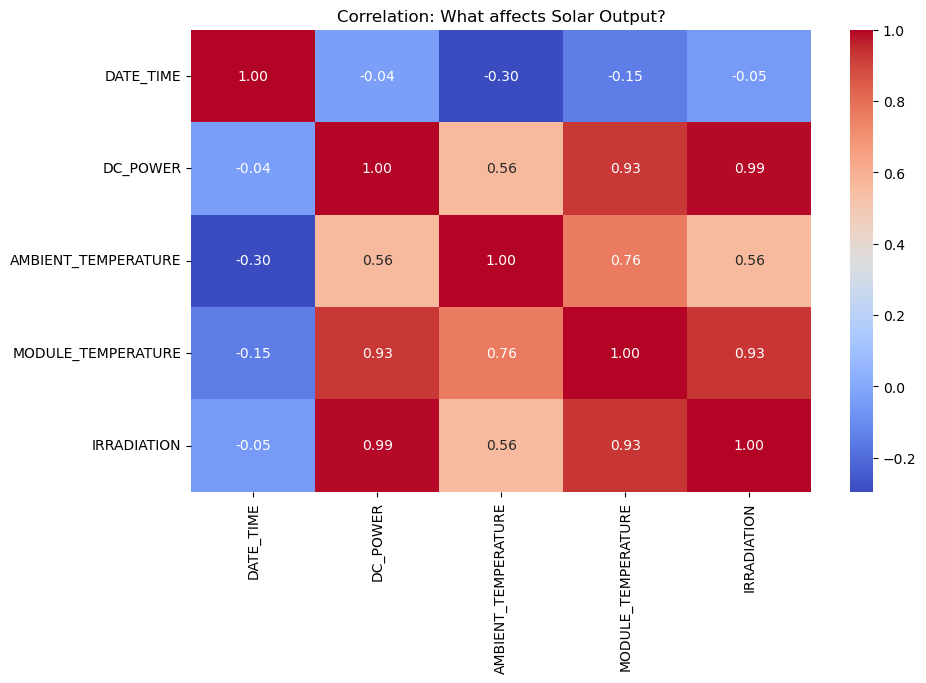

In [3]:
# Visualizing Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: What affects Solar Output?")
plt.show()

In [4]:
# 1. Define Inputs (X) and Target (y)
X = df[['IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']]
y = df['DC_POWER']

# 2. Split Data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Random Forest Model
print("Training Model... (This might take a moment)")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Calculate Accuracy
score = model.score(X_test, y_test)
print(f"Model R² Score (Accuracy): {score:.4f}")

# 5. Save the model file
filename = 'solar_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"✅ Success! Model saved as '{filename}'")

Training Model... (This might take a moment)
Model R² Score (Accuracy): 0.9896
✅ Success! Model saved as 'solar_model.pkl'
